# Project - Loan Apporoval Prediction

# Problem Statement
This dataset is commonly used in machine learning and data analysis to develop models 
and algorithms that predict the likelihood of loan approval based on the given features.

In [3]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To avoid warning
import warnings
warnings.filterwarnings("ignore")

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import skew

In [4]:
data=pd.read_csv("loan_approval_dataset.csv")
data

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [5]:
data.shape

(4269, 13)

In [6]:
data.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
data.columns = data.columns.str.strip()    #remove any leading or trailing whitespace from the column names

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [11]:
df1 = data.drop(["loan_id"],axis=1)

In [12]:
df1.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [13]:
df1.duplicated().sum()  #giving the total count of duplicate rows.

0

In [14]:
w=df1.columns
w

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [15]:
df1.nunique()

no_of_dependents              6
education                     2
self_employed                 2
income_annum                 98
loan_amount                 378
loan_term                    10
cibil_score                 601
residential_assets_value    278
commercial_assets_value     188
luxury_assets_value         379
bank_asset_value            146
loan_status                   2
dtype: int64

In [16]:
for i in w:
    print(data[i].value_counts())
    print("*"*100)

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64
****************************************************************************************************
education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
****************************************************************************************************
self_employed
Yes    2150
No     2119
Name: count, dtype: int64
****************************************************************************************************
income_annum
7000000    62
4100000    59
7600000    57
4700000    56
6900000    55
           ..
3600000    33
3400000    33
9300000    33
8500000    32
6700000    30
Name: count, Length: 98, dtype: int64
****************************************************************************************************
loan_amount
10600000    27
20000000    24
9400000     24
16800000    23
23900000    23
            ..
35800000     1
38500000     1
39500000     1
38800

In [17]:
df_obj=df1.select_dtypes(include='object')
df_obj

,education,self_employed,loan_status
0,Graduate,No,Approved
1,Not Graduate,Yes,Rejected
2,Graduate,No,Rejected
3,Graduate,No,Rejected
4,Not Graduate,Yes,Rejected
...,...,...,...
4264,Graduate,Yes,Rejected
4265,Not Graduate,Yes,Approved
4266,Not Graduate,No,Rejected
4267,Not Graduate,No,Approved


In [18]:
df_num=df1.select_dtypes(exclude='object')
df_num

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [19]:
a=df_num.columns
a

Index(['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term',
       'cibil_score', 'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

# Data visualizations

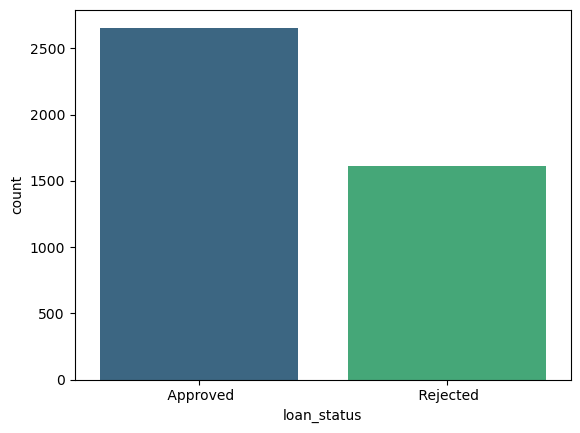

In [21]:
sns.countplot(x="loan_status",data=data, palette='viridis')
plt.show()

In [22]:
target_percentage = data['loan_status'].value_counts(normalize=True) * 100
target_percentage

loan_status
Approved    62.215976
Rejected    37.784024
Name: proportion, dtype: float64

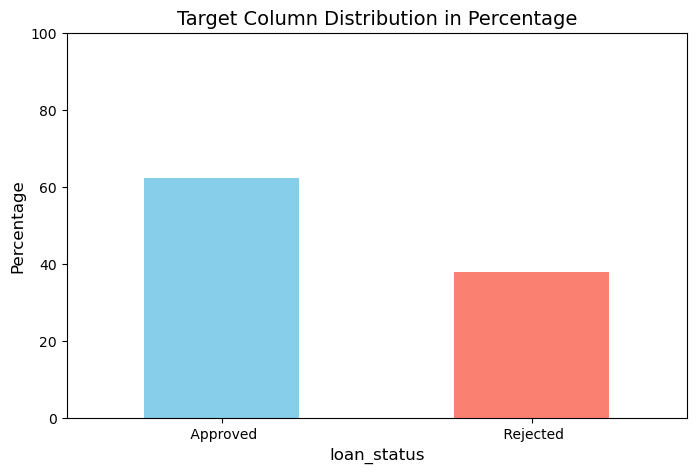

In [23]:
plt.figure(figsize=(8, 5))
target_percentage.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Column Distribution in Percentage', fontsize=14)
plt.ylabel('Percentage', fontsize=12)
plt.xlabel('loan_status', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.show()

# Handling Outliers

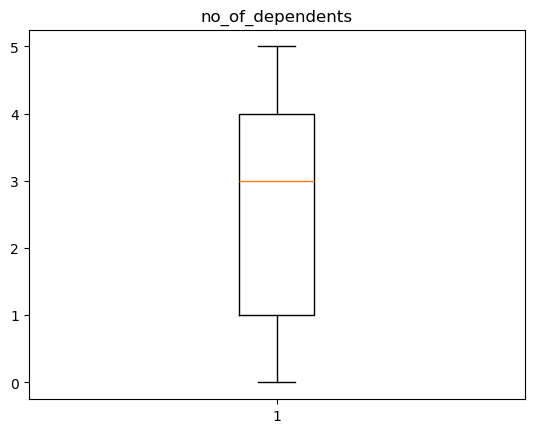

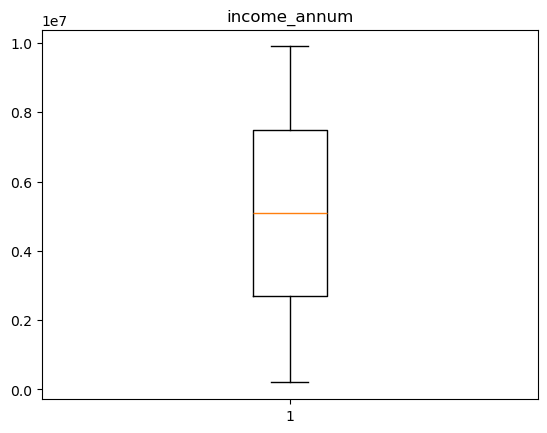

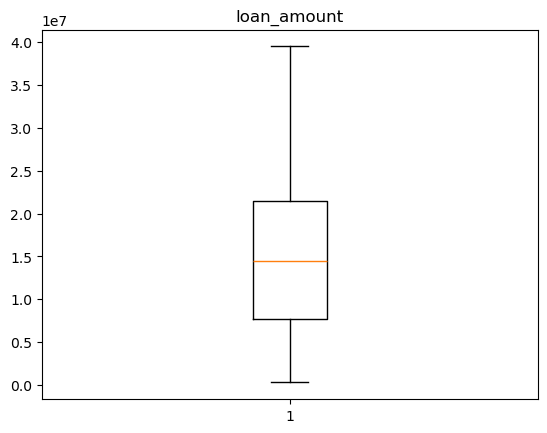

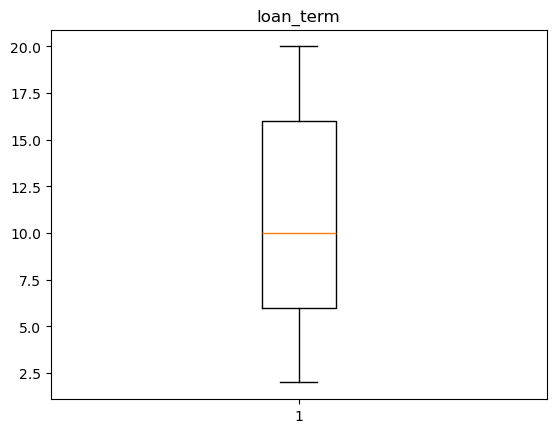

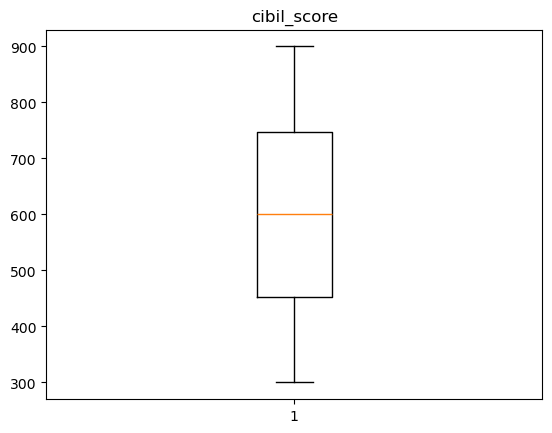

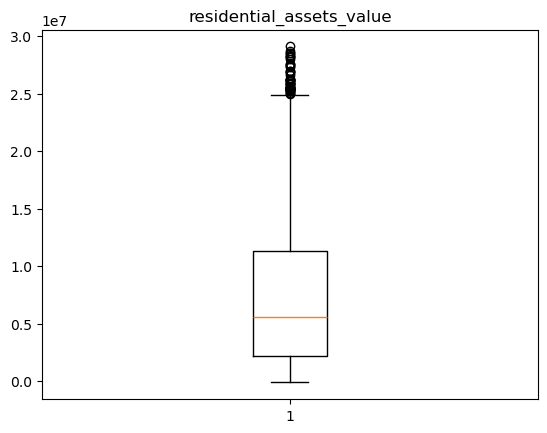

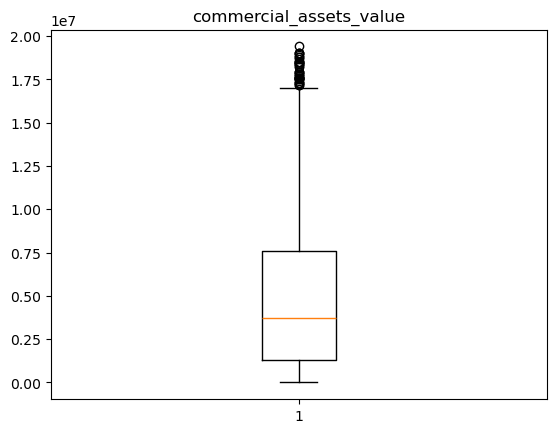

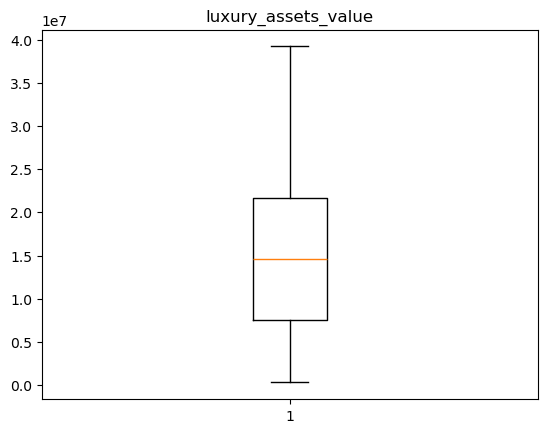

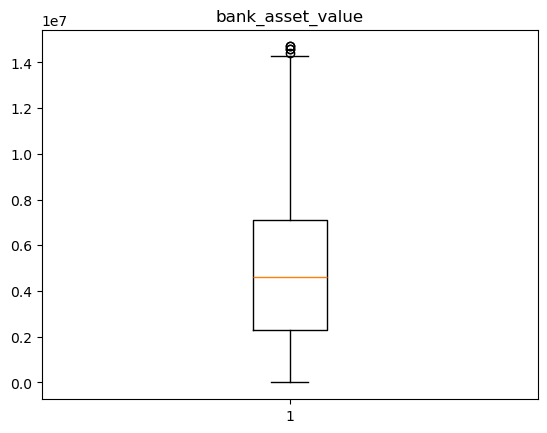

In [25]:
for i in a:
    plt.boxplot(x=df1[i])
    plt.title(i)
    plt.show()

In [26]:
q1=df1['residential_assets_value'].quantile(0.25)
q3=df1['residential_assets_value'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1", q1)
print("q3", q3)
print("iqr", iqr)
print("upperbound", ub)
print("lowerbound", lb)

q1 2200000.0
q3 11300000.0
iqr 9100000.0
upperbound 24950000.0
lowerbound -11450000.0


In [27]:
df1.loc[df1['residential_assets_value']>ub]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
82,2,Not Graduate,Yes,9900000,21200000,16,363,25500000,11400000,26600000,6800000,Rejected
98,4,Graduate,No,9400000,29400000,12,562,25900000,15200000,36400000,7100000,Approved
123,0,Not Graduate,Yes,9000000,18700000,18,865,26800000,0,20900000,11300000,Approved
228,1,Not Graduate,Yes,8700000,27000000,10,717,25500000,8600000,17500000,9100000,Approved
262,3,Graduate,No,9200000,34300000,18,523,25600000,4000000,29100000,8800000,Rejected
693,0,Graduate,No,9200000,25400000,2,783,25400000,2000000,19600000,12400000,Approved
714,4,Not Graduate,No,9900000,22700000,12,567,28300000,9900000,29700000,5400000,Approved
781,3,Not Graduate,Yes,9900000,20400000,4,865,26300000,3600000,36500000,12800000,Approved
892,4,Graduate,No,9300000,24900000,14,455,27600000,4700000,35100000,13900000,Rejected
905,5,Not Graduate,No,9700000,37000000,14,459,28700000,17900000,22800000,5600000,Rejected


In [28]:
df1.loc[df1['residential_assets_value']>ub, 'residential_assets_value']=ub

In [29]:
df1.loc[df1['residential_assets_value']>ub]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [30]:
q1=df1['commercial_assets_value'].quantile(0.25)
q3=df1['commercial_assets_value'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1", q1)
print("q3", q3)
print("iqr", iqr)
print("upperbound", ub)
print("lowerbound", lb)

q1 1300000.0
q3 7600000.0
iqr 6300000.0
upperbound 17050000.0
lowerbound -8150000.0


In [31]:
df1.loc[df1['commercial_assets_value']>ub]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
157,5,Not Graduate,Yes,9900000,33300000,6,364,5300000,18700000,27800000,8300000,Rejected
231,2,Graduate,No,9800000,32400000,2,543,24200000,17500000,25700000,7700000,Approved
258,0,Graduate,No,9800000,38800000,8,652,23200000,19000000,29700000,5400000,Approved
323,3,Not Graduate,Yes,9500000,24200000,8,879,3100000,17200000,26400000,12700000,Approved
367,1,Not Graduate,Yes,9400000,29800000,10,377,24100000,18500000,30900000,11700000,Rejected
554,3,Not Graduate,Yes,9500000,22800000,6,319,200000,18800000,34100000,9400000,Rejected
791,4,Graduate,Yes,9300000,35500000,6,547,2800000,17800000,27000000,13900000,Rejected
895,0,Graduate,No,9400000,27900000,6,456,21400000,18500000,35600000,7800000,Rejected
905,5,Not Graduate,No,9700000,37000000,14,459,24950000,17900000,22800000,5600000,Rejected


In [32]:
df1.loc[df1['commercial_assets_value']>ub, 'commercial_assets_value']=ub

In [33]:
df1.loc[df1['commercial_assets_value']>ub]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [34]:
q1=df1['bank_asset_value'].quantile(0.25)
q3=df1['bank_asset_value'].quantile(0.75)
iqr=q3-q1
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)
print("q1", q1)
print("q3", q3)
print("iqr", iqr)
print("upperbound", ub)
print("lowerbound", lb)

q1 2300000.0
q3 7100000.0
iqr 4800000.0
upperbound 14300000.0
lowerbound -4900000.0


In [35]:
df1.loc[df1['bank_asset_value']>ub]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
200,4,Not Graduate,Yes,9800000,21200000,20,355,22000000,8900000,31800000,14400000,Rejected
1272,5,Not Graduate,No,9900000,35800000,20,470,9500000,17050000,39100000,14700000,Rejected
1633,0,Graduate,Yes,9800000,23200000,10,573,23900000,3300000,23600000,14600000,Approved
1674,1,Not Graduate,No,9800000,21300000,2,356,23000000,12300000,25700000,14600000,Rejected
1805,5,Not Graduate,No,9900000,33600000,20,580,7000000,10800000,37400000,14700000,Approved


In [36]:
df1.loc[df1['bank_asset_value']>ub,'bank_asset_value']=ub

In [37]:
df1.loc[df1['bank_asset_value']>ub]

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


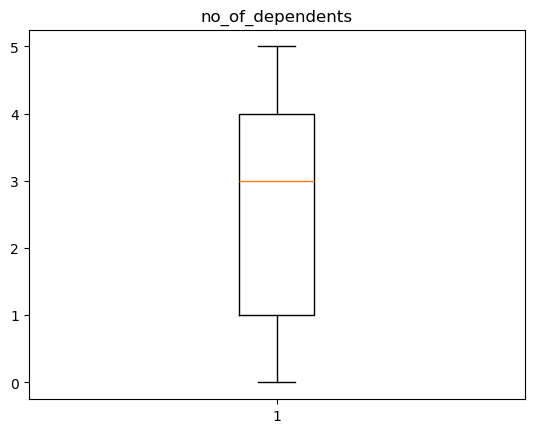

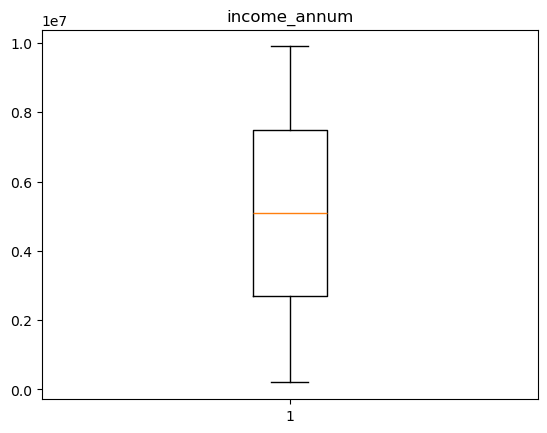

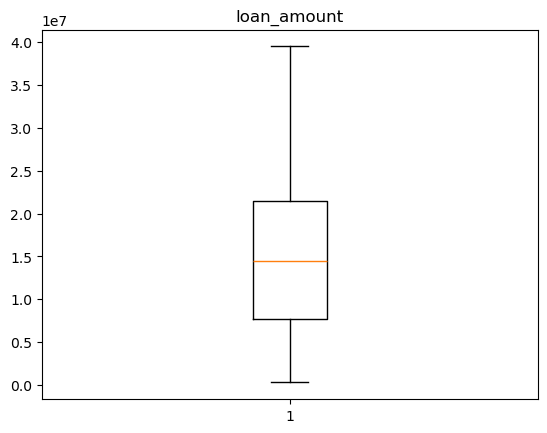

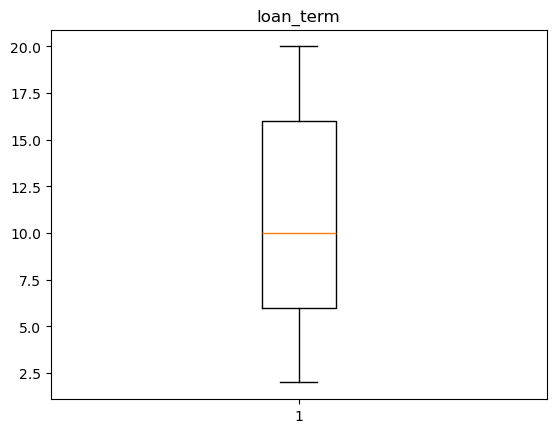

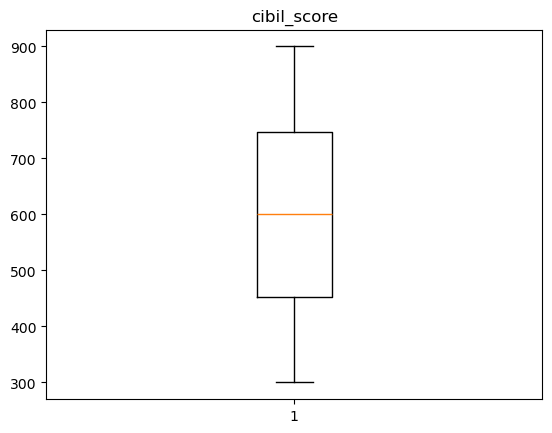

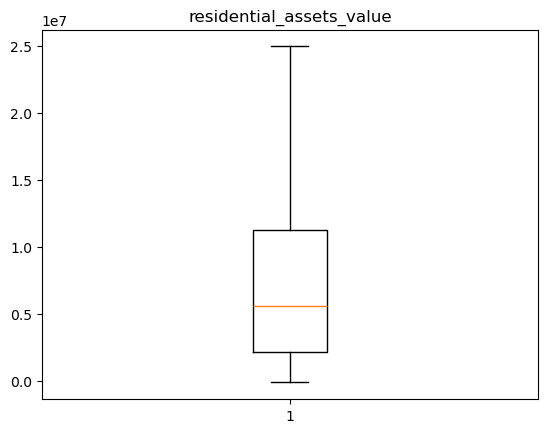

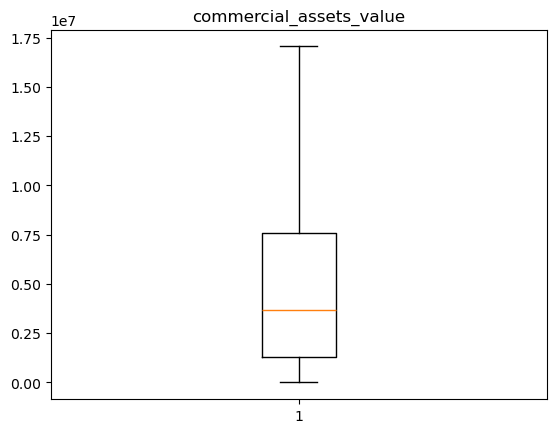

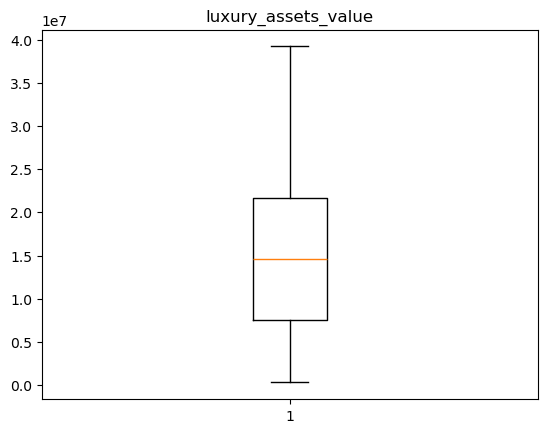

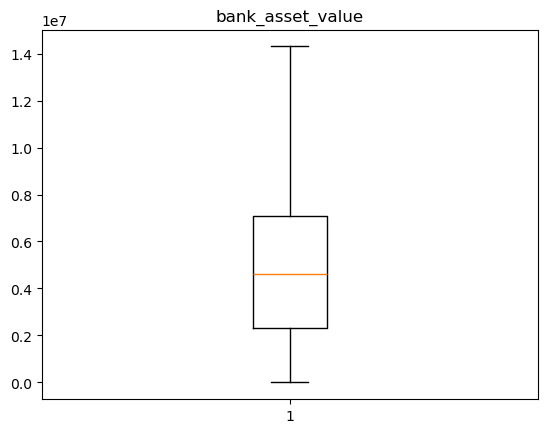

In [38]:
for i in a:
    plt.boxplot(x=df1[i])
    plt.title(i)
    plt.show()

In [39]:
for i in df_obj:
    print(df1[i].value_counts().sort_index())
    print("*"*50)

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64
**************************************************
self_employed
No     2119
Yes    2150
Name: count, dtype: int64
**************************************************
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64
**************************************************


In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le=LabelEncoder()

In [42]:
df1['education']=le.fit_transform(df1['education'])
df1['self_employed']=le.fit_transform(df1['self_employed'])
df1['loan_status']=le.fit_transform(df1['loan_status'])

In [43]:
df1

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17050000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [44]:
df1["loan_status"].value_counts()

loan_status
0    2656
1    1613
Name: count, dtype: int64

In [45]:
df1.corr().tail(1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_status,0.018114,0.004918,-0.000345,0.015189,-0.01615,0.113036,-0.770518,0.014985,-0.008799,0.015465,0.006746,1.0


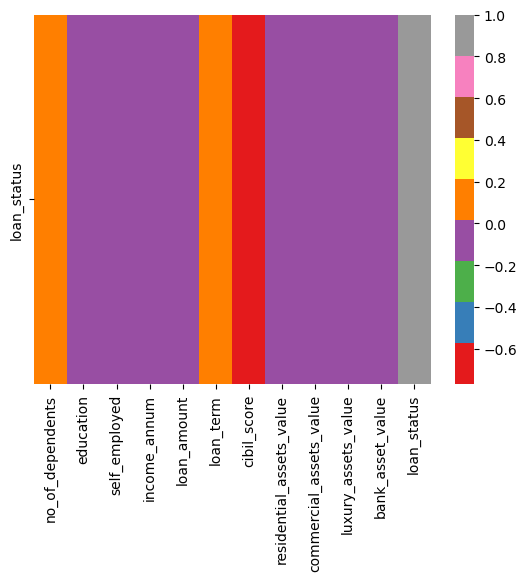

In [46]:
sns.heatmap(df1.corr().tail(1), cmap="Set1")
plt.show()

In [47]:
for i in df1:
    print(i,skew(df1[i]))
    print("*"*50)

no_of_dependents -0.017964228035582553
**************************************************
education 0.008901470220180877
**************************************************
self_employed -0.014523690500055735
**************************************************
income_annum -0.012809922048151696
**************************************************
loan_amount 0.3086153978159286
**************************************************
loan_term 0.03634613066755639
**************************************************
cibil_score -0.009036100886026986
**************************************************
residential_assets_value 0.9405494883732272
**************************************************
commercial_assets_value 0.9283791739208204
**************************************************
luxury_assets_value 0.3220942776824955
**************************************************
bank_asset_value 0.5586130915667582
**************************************************
loan_status 0.5039101304749749
**********

In [48]:
x = df1.drop('loan_status', axis= 1)
y = df1['loan_status']

# Scaling

In [50]:
w=df1.columns
w

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [51]:
scaler=MinMaxScaler()

In [52]:
for i in w:
    df1[i]=scaler.fit_transform(df1[[i]])

In [53]:
df1

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.4,0.0,0.0,0.969072,0.755102,0.555556,0.796667,0.099800,1.000000,0.575835,0.559441,0.0
1,0.0,1.0,1.0,0.402062,0.303571,0.333333,0.195000,0.111776,0.129032,0.218509,0.230769,1.0
2,0.6,0.0,0.0,0.917526,0.750000,1.000000,0.343333,0.287425,0.263930,0.848329,0.895105,1.0
3,0.6,0.0,0.0,0.824742,0.775510,0.333333,0.278333,0.730539,0.193548,0.591260,0.552448,1.0
4,1.0,1.0,1.0,0.989691,0.609694,1.000000,0.136667,0.499002,0.480938,0.748072,0.349650,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,1.0,0.0,1.0,0.082474,0.051020,0.555556,0.028333,0.115768,0.029326,0.077121,0.055944,1.0
4265,0.0,1.0,1.0,0.319588,0.280612,1.000000,0.431667,0.171657,0.170088,0.275064,0.132867,0.0
4266,0.4,1.0,0.0,0.649485,0.602041,0.888889,0.261667,0.051896,0.727273,0.457584,0.510490,1.0
4267,0.2,1.0,0.0,0.402062,0.318878,0.333333,0.800000,0.331337,0.041056,0.354756,0.405594,0.0


In [54]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [55]:
x = df1.drop('loan_status', axis= 1)
y = df1['loan_status']

smt = SMOTE(random_state=10)
x_sample, y_sample = smt.fit_resample(x,y)

x = x_sample
y = y_sample

In [56]:
y.value_counts()

loan_status
0.0    2656
1.0    2656
Name: count, dtype: int64

# Train Test Split

In [58]:
X = df1.drop('loan_status',axis=1)
Y = df1['loan_status']

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=11)

In [60]:
X_train

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
1899,0.2,0.0,0.0,0.030928,0.025510,0.222222,0.616667,0.043912,0.029326,0.028278,0.048951
1767,1.0,0.0,1.0,0.000000,0.002551,0.888889,0.870000,0.011976,0.017595,0.007712,0.020979
2076,0.4,1.0,0.0,0.134021,0.099490,0.777778,0.785000,0.103792,0.046921,0.138817,0.076923
2727,0.4,0.0,1.0,0.917526,0.880102,1.000000,0.893333,0.854291,0.639296,0.778920,0.692308
2245,0.8,0.0,1.0,0.237113,0.221939,0.444444,0.156667,0.271457,0.117302,0.179949,0.209790
...,...,...,...,...,...,...,...,...,...,...,...
332,0.4,1.0,1.0,0.453608,0.461735,0.000000,0.425000,0.311377,0.140762,0.357326,0.293706
1293,0.2,0.0,1.0,0.319588,0.262755,0.666667,0.736667,0.015968,0.035191,0.208226,0.314685
4023,0.0,1.0,0.0,0.371134,0.331633,0.222222,0.591667,0.387226,0.000000,0.213368,0.181818
3775,0.8,1.0,1.0,0.020619,0.028061,0.444444,0.608333,0.015968,0.017595,0.030848,0.013986


In [61]:
X_test

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
2801,0.6,0.0,1.0,0.432990,0.247449,0.333333,0.958333,0.239521,0.304985,0.293059,0.286713
2834,0.4,1.0,0.0,0.185567,0.102041,0.777778,0.328333,0.207585,0.011730,0.138817,0.195804
777,0.4,0.0,0.0,0.422680,0.232143,0.000000,0.308333,0.443114,0.475073,0.275064,0.153846
2379,1.0,0.0,0.0,0.731959,0.660714,0.444444,0.751667,0.059880,0.715543,0.678663,0.727273
1005,0.4,0.0,0.0,0.783505,0.558673,0.444444,0.725000,0.391218,0.269795,0.583548,0.482517
...,...,...,...,...,...,...,...,...,...,...,...
1919,0.6,1.0,0.0,0.072165,0.040816,0.555556,0.411667,0.099800,0.023460,0.069409,0.027972
3133,0.8,0.0,0.0,0.051546,0.051020,0.777778,0.646667,0.063872,0.017595,0.041131,0.027972
1167,0.2,0.0,1.0,0.824742,0.479592,0.333333,0.531667,0.690619,0.715543,0.802057,0.461538
97,0.4,1.0,0.0,0.876289,0.630102,1.000000,0.935000,0.590818,0.498534,0.588689,0.510490


In [62]:
X_train.shape

(3415, 11)

In [63]:
X_test.shape

(854, 11)

In [64]:
Y_train.shape

(3415,)

In [65]:
Y_test.shape

(854,)

# Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [68]:
model_LR = LogisticRegression()
model_LR.fit(X_train,Y_train)
Y_pred = model_LR.predict(X_test)

In [69]:
# Training Accuracy
y_pred_train= model_LR.predict(X_train)

cnf_matrix = confusion_matrix(y_pred_train, Y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, Y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, Y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[1988  147]
 [ 128 1152]]
************************************************************
Accuracy :  0.9194729136163983
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      2135
         1.0       0.89      0.90      0.89      1280

    accuracy                           0.92      3415
   macro avg       0.91      0.92      0.91      3415
weighted avg       0.92      0.92      0.92      3415



In [70]:
# Testing Accuracy
y_pred = model_LR.predict(X_test)

cnf_matrix = confusion_matrix(y_pred, Y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, Y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[505  42]
 [ 35 272]]
************************************************************
Accuracy :  0.9098360655737705
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       547
         1.0       0.87      0.89      0.88       307

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854



# AUC-ROC Curve

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [73]:
y_pred_prob = model_LR.predict_proba(X_train)
y_pred_prob[:,1]
fpr, tpr , thresh = roc_curve(Y_train, y_pred_prob[:,1])

Text(0.5, 1.0, 'Approved/Rejected')

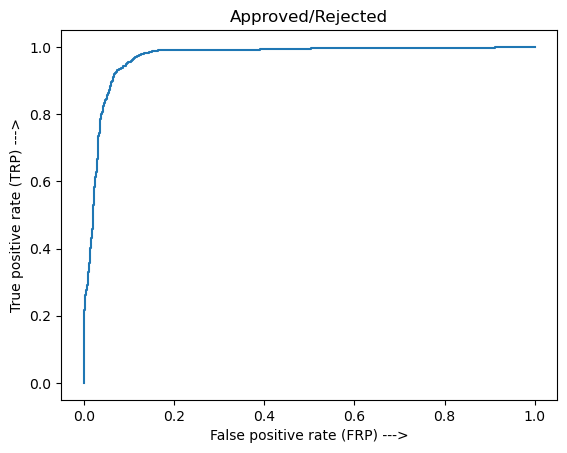

In [74]:
plt.plot(fpr, tpr)

plt.xlabel("False positive rate (FRP) --->")
plt.ylabel("True positive rate (TRP) --->") 
plt.title("Approved/Rejected")

In [75]:
auc_value= auc(fpr, tpr)

In [182]:
auc_value

0.9687759669718309

# Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
model_dt = DecisionTreeClassifier(random_state=11)
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=11)

In [78]:
# Training Accuracy
y_pred_train= model_dt.predict(X_train)

cnf_matrix = confusion_matrix(y_pred_train, Y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, Y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, Y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[2116    0]
 [   0 1299]]
************************************************************
Accuracy :  1.0
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2116
         1.0       1.00      1.00      1.00      1299

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415



In [79]:
# Testing Accuracy
y_pred = model_dt.predict(X_test)

cnf_matrix = confusion_matrix(y_pred, Y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, Y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[528   9]
 [ 12 305]]
************************************************************
Accuracy :  0.9754098360655737
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       537
         1.0       0.97      0.96      0.97       317

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



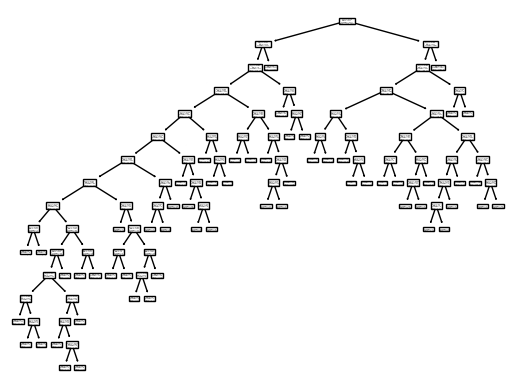

In [80]:
plot_tree(model_dt)
plt.show()

# Random Forest

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=1)

In [84]:
# Training Accuracy
y_pred_train= model_rf.predict(X_train)

cnf_matrix = confusion_matrix(y_pred_train, Y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, Y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, Y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[2116    0]
 [   0 1299]]
************************************************************
Accuracy :  1.0
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2116
         1.0       1.00      1.00      1.00      1299

    accuracy                           1.00      3415
   macro avg       1.00      1.00      1.00      3415
weighted avg       1.00      1.00      1.00      3415



In [85]:
y_pred = model_rf.predict(X_test)

cnf_matrix = confusion_matrix(y_pred, Y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, Y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[531  10]
 [  9 304]]
************************************************************
Accuracy :  0.977751756440281
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       541
         1.0       0.97      0.97      0.97       313

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



# Adaboost

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
model_ab = AdaBoostClassifier(random_state=30)
model_ab.fit(X_train, Y_train)
y_pred2 = model_ab.predict(X_test)

In [89]:
# Training Accuracy
y_pred_train= model_ab.predict(X_train)

cnf_matrix = confusion_matrix(y_pred_train, Y_train)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred_train, Y_train)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred_train, Y_train)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[2069   47]
 [  47 1252]]
************************************************************
Accuracy :  0.9724743777452416
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2116
         1.0       0.96      0.96      0.96      1299

    accuracy                           0.97      3415
   macro avg       0.97      0.97      0.97      3415
weighted avg       0.97      0.97      0.97      3415



In [90]:
# Testing Accuracy
y_pred = model_ab.predict(X_test)

cnf_matrix = confusion_matrix(y_pred, Y_test)
print("Confusion Matrix: \n", cnf_matrix)
print("*"*60)

accuracy = accuracy_score(y_pred, Y_test)
print("Accuracy : ",accuracy)
print("*"*60)

clf_report  = classification_report(y_pred, Y_test)
print("Classification report :\n",clf_report)

Confusion Matrix: 
 [[521  19]
 [ 19 295]]
************************************************************
Accuracy :  0.955503512880562
************************************************************
Classification report :
               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       540
         1.0       0.94      0.94      0.94       314

    accuracy                           0.96       854
   macro avg       0.95      0.95      0.95       854
weighted avg       0.96      0.96      0.96       854



In [91]:
model_LR.score(X_test,Y_test)

0.9098360655737705

In [92]:
model_dt.score(X_test,Y_test)

0.9754098360655737

In [93]:
model_rf.score(X_test,Y_test)

0.977751756440281

In [94]:
model_ab.score(X_test,Y_test)

0.955503512880562

# Conclusion

1. Loan Status is negatively correlated to Cibil Score. Becuase during Label Encoding, Approved was encoded as 0 and Non approval as 1.

2. Cibil score has the highest importance score to predict the Loan Status.And other features followed by less significance or impact.